In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-zcvyf5cu
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ipython in c:\users\anirudh\anaconda3\lib\site-packages (from qiskit-textbook==0.1.0) (7.19.0)



  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17069 sha256=4d0756f8648e045d2e417479b5e6b615acfffa9518692efa7c26f1bef1380138
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-rcne55hk\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [3]:
from qiskit import IBMQ
IBMQ.save_account('c81b6ab5c814d3a62d6c5e9b6fd7bb399a602777eb49f83e1578c6928a03819c462cd75b67812ca14d3e48733e00525180a6cda445774766f5d012c1758a10ec', overwrite=True)

In [4]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle


In [5]:
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''


In [6]:
oracle = LogicalExpressionOracle(input_3sat)

In [7]:
grover = Grover(oracle)

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])


[1, 2, -3]


C:\Users\ANIRUDH\anaconda3\lib\site-packages\qiskit\aqua\algorithms\amplitude_amplifiers\grover.py:608: DeprecationWarning: result deprecated, use assignment property.
  warnings.warn('result deprecated, use assignment property.', DeprecationWarning)


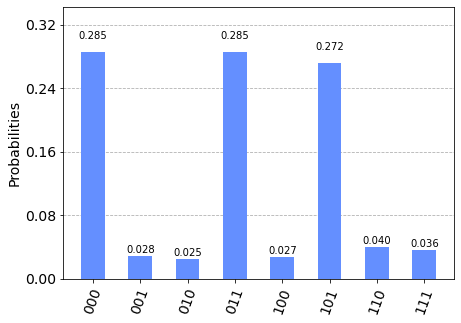

In [9]:
plot_histogram(result['measurement'])

In [10]:
# Load our saved IBMQ accounts and get the ibmq_16_melbourne backend
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')


C:\Users\ANIRUDH\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [11]:
from qiskit.compiler import transpile

# transpile the circuit for ibmq_16_melbourne
grover_compiled = transpile(result['circuit'], backend=backend, optimization_level=3)

print('gates = ', grover_compiled.count_ops())
print('depth = ', grover_compiled.depth())


gates =  OrderedDict([('cx', 413), ('u2', 154), ('u1', 89), ('u3', 38), ('measure', 3), ('barrier', 1)])
depth =  451
